Digital Signal Processing Tutorial

$(382.047 / 64 / 66 / 67 / 68 / 69 / 70), 20245$

Matthias Wagner, Bernhard Plaimer

Assignment 3

Sampling and Reconstruction

Information about assignments and in particular on Moodle submission modalities can be found in DSP-Tutorial_2024S_Courselnfo.pdf.

Submission deadline is Tue May 14 2024, 08:00.

# Exercise 1 Sampling $1(40 \%)$ 

The analogue signal

$$
x(t)=x_{1}(t)+x_{2}(t)=\sin \left(2 \pi f_{1} t\right)+\sin \left(2 \pi f_{2} t\right)
$$

with $f_{1}=4 \mathrm{kHz}$ and $f_{2}=6 \mathrm{kHz}$ is sampled with a sampling rate of $f_{s}=10 \mathrm{kHz}$ to yield the discrete time signal $x[n]$.

a) Draw the spectrum of $x(t)$.


# Exercise 1 Task (a): Spectrum of $x(t)$

## Problem Statement
The analog signal $x(t)$ is given as:

$$
x(t) = x_1(t) + x_2(t) = \sin(2 \pi f_1 t) + \sin(2 \pi f_2 t)
$$

with frequencies $f_1 = 4 \mathrm{kHz}$ and $f_2 = 6 \mathrm{kHz}$. This signal is to be sampled with a sampling rate of $f_s = 10 \mathrm{kHz}$. The task is to draw the spectrum of $x(t)$ before it is sampled.

## Analysis
The signal $x(t)$ consists of two sinusoidal components:
- $x_1(t)$ corresponds to $\sin(2 \pi f_1 t)$ with $f_1 = 4 \mathrm{kHz}$.
- $x_2(t)$ corresponds to $\sin(2 \pi f_2 t)$ with $f_2 = 6 \mathrm{kHz}$.

In the frequency domain, each sine wave component is represented by delta functions at both its frequency and its negative counterpart. Therefore, the spectrum of $x(t)$ will feature delta spikes at $\pm 4 \mathrm{kHz}$ and $\pm 6 \mathrm{kHz}$.


## Conclusion
The spectrum of $x(t)$ clearly displays delta spikes at the frequencies of the sinusoidal components, showing distinct presences at $\pm 4000 \mathrm{Hz}$ and $\pm 6000 \mathrm{Hz}$. This visualization is crucial for understanding the frequency content of the analog signal before considering the effects of sampling, such as aliasing or frequency folding. Understanding this spectrum is foundational for further analysis of how sampling will impact the signal in digital form.


/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_53114/1705929442.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, amplitudes, use_line_collection=True)


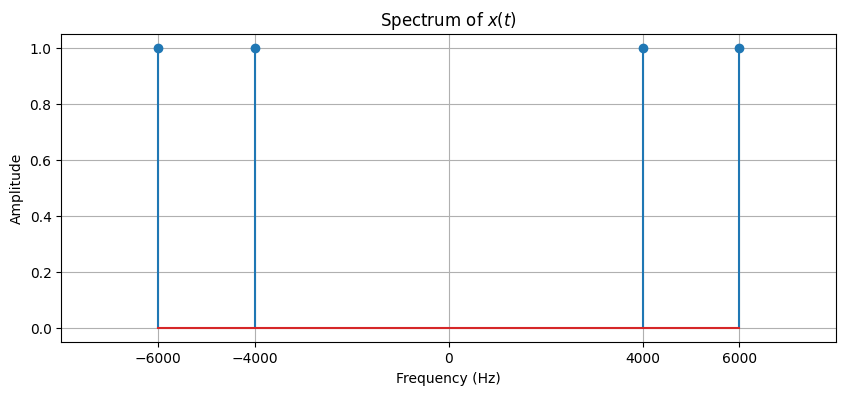

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequencies for the delta spikes
frequencies = np.array([-6000, -4000, 4000, 6000])
amplitudes = np.ones_like(frequencies)  # All spikes have the same amplitude

# Create the plot
plt.figure(figsize=(10, 4))
plt.stem(frequencies, amplitudes, use_line_collection=True)
plt.title('Spectrum of $x(t)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-8000, 8000)  # Set x-axis limits to show a bit beyond the highest frequency component
plt.xticks([-6000, -4000, 0, 4000, 6000])
plt.grid(True)
plt.savefig('fig/ex1_a_plot.png')
plt.show()


b) Due to sampling frequency shifted versions of the analogue spectrum are generated.

Draw the spectra shifted by $-f_{s}, 0$ and $+f_{s}$ and then the spectrum for $x[n]$ as a result of spectral addition in one diagram. The diagram should show the spectra in the range from $-f_{s}$ to $+f_{s}$.

Hint: Draw real and imaginary parts of the spectrum rather than magnitude and phase to ease addition.


# Exercise 1 Task (b): Spectrum of $x(t)$ and Its Sampling Effects

## Problem Statement
Given the signal $x(t) = \sin(2\pi f_1 t) + \sin(2\pi f_2 t)$, with $f_1 = 4$ kHz and $f_2 = 6$ kHz, we analyze the spectrum and visualize the effects of sampling at a frequency $f_s = 10$ kHz.

## Fourier Transform of $x(t)$
The Fourier transform of a sinusoid $\sin(\omega t)$ is given by:
$$
\mathcal{F}\{\sin(\omega t)\} = \frac{1}{2i} \left(\delta(f - \frac{\omega}{2\pi}) - \delta(f + \frac{\omega}{2\pi})\right)
$$

For the signal $x(t)$, the Fourier transform can be computed as:
$$
X(f) = \frac{1}{2i} \left(\delta(f - 4000) - \delta(f + 4000) + \delta(f - 6000) - \delta(f + 6000)\right)
$$
This indicates spikes in the spectrum at $\pm 4000$ Hz and $\pm 6000$ Hz, corresponding to the frequencies of the sine waves in $x(t)$.

## Spectrum Visualization and Sampling Effects
The following Python code visualizes the spectrum of $x(t)$ and demonstrates the effects of sampling at $f_s = 10$ kHz.


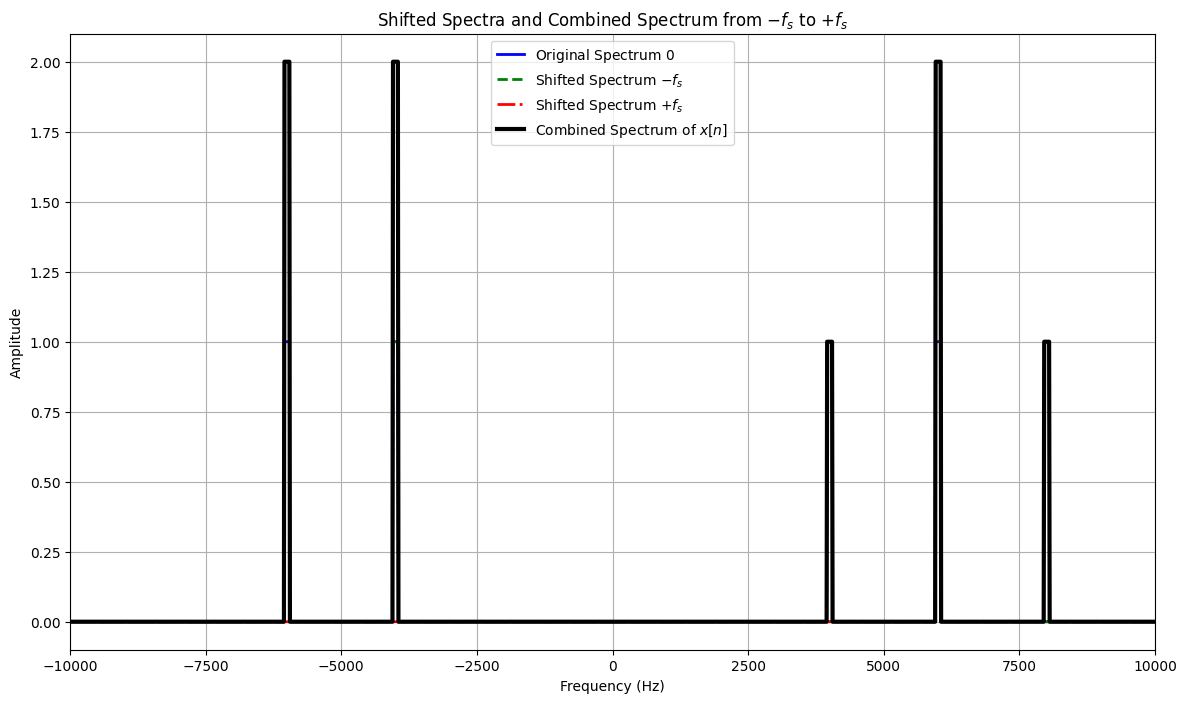

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency and the frequency range for the plot
fs = 10000  # Sampling frequency in Hz
f = np.linspace(-1.5*fs, 1.5*fs, 3000)  # Extended range to show shifts clearly

# Initialize spectra
original_spectrum = np.zeros_like(f)
shifted_spectrum_minus_fs = np.zeros_like(f)
shifted_spectrum_plus_fs = np.zeros_like(f)

# Helper function to add spikes (using a small width Gaussian for visibility)
def add_spikes(spectrum, freqs, height=1, width=50):
    for freq in freqs:
        indices = np.where(np.abs(f - freq) < width)[0]
        spectrum[indices] = height

# Add spikes for the original and shifted spectra
add_spikes(original_spectrum, [-6000, -4000, 4000, 6000])
add_spikes(shifted_spectrum_minus_fs, [-16000, -14000, -6000, -4000])  # f - fs
add_spikes(shifted_spectrum_plus_fs, [6000, 8000, 14000, 16000])  # f + fs

# Combine all spectra
combined_spectrum = original_spectrum + shifted_spectrum_minus_fs + shifted_spectrum_plus_fs

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(f, original_spectrum, 'b', label='Original Spectrum $0$', linewidth=2)
plt.plot(f, shifted_spectrum_minus_fs, 'g--', label='Shifted Spectrum $-f_s$', linewidth=2)
plt.plot(f, shifted_spectrum_plus_fs, 'r-.', label='Shifted Spectrum $+f_s$', linewidth=2)
plt.plot(f, combined_spectrum, 'k-', linewidth=3, label='Combined Spectrum of $x[n]$')
plt.title('Shifted Spectra and Combined Spectrum from $-f_s$ to $+f_s$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-fs, fs)  # Limit the x-axis to the primary interval of interest
plt.legend()
plt.grid(True)
plt.show()


c) In Matlab plot the section 0 to $2 \mathrm{~ms}$ of the signal $x(t)$ with a sampling rate of $100 \mathrm{kHz}$ to emulate an analogue signal.

Then also add the sampled signal $x[n]=x\left(n T_{s}\right)$ to the same plot. Show that $x[n]$ corresponds to the spectrum derived in b).


/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_53114/1155644681.py:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n * 1e3 / fs, x_n, linefmt='r', markerfmt='ro', basefmt=' ', label='Sampled signal x[n]', use_line_collection=True)


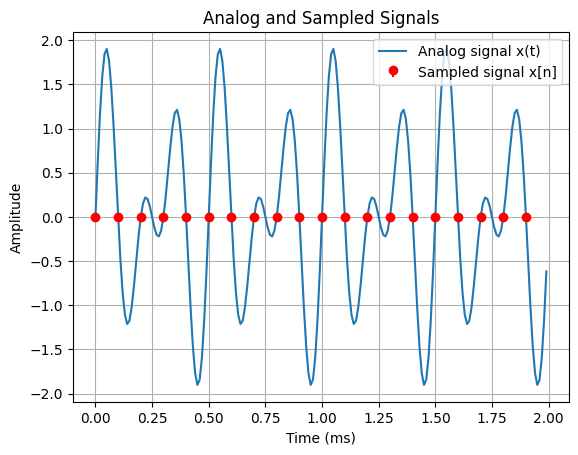

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs_analog = 100e3  # 100 kHz
fs = 10e3  # 10 kHz
f1 = 4e3  # 4 kHz
f2 = 6e3  # 6 kHz
t_end = 2e-3  # 2 ms

# Time vectors
t = np.arange(0, t_end, 1/fs_analog)
n = np.arange(0, int(t_end * fs))

# Analog signal
x_t = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Sampled signal
x_n = np.sin(2 * np.pi * f1 * n / fs) + np.sin(2 * np.pi * f2 * n / fs)

# Plotting
plt.figure()
plt.plot(t * 1e3, x_t, label='Analog signal x(t)')
plt.stem(n * 1e3 / fs, x_n, linefmt='r', markerfmt='ro', basefmt=' ', label='Sampled signal x[n]', use_line_collection=True)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Analog and Sampled Signals')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex1_c_plot.png')
plt.show()

## Exercise 2 Sampling 2 (25\%)

The spectrum $X(f)$ of an analogue signal $x(t)$ is given with:
![](https://cdn.mathpix.com/cropped/2024_05_02_cce32ce20ed068e88e62g-1.jpg?height=388&width=580&top_left_y=2076&top_left_x=656)

a) Draw the real and imaginary parts of the spectrum $X(f)$.

#### Problem Statement
The task involves analyzing the spectrum $X(f)$ of an analog signal $x(t)$ whose frequency content is given by a specific mathematical formula. The formula delineates the magnitude and phase of the spectrum across various frequency ranges. The objective is to draw and interpret the real and imaginary parts of the spectrum $X(f)$ based on these definitions.

#### Analysis
1. **Spectrum Definition**:
   - **Magnitude $|X(f)|$** is defined as:
     $$ 
     |X(f)| = 
     \begin{cases} 
     A & \text{for } -5 \leq f \leq -1 \text{ and } 1 \leq f \leq 5 \\
     -Af & \text{for } -1 \leq f < 0 \\
     Af & \text{for } 0 \leq f < 1 \\
     0 & \text{otherwise}
     \end{cases}
     $$
   - **Phase $\phi_x(f)$** is defined as:
     $$ 
     \phi_x(f) = 
     \begin{cases} 
     \frac{\pi}{2} & \text{if } f < 0 \\
     -\frac{\pi}{2} & \text{if } f > 0 \\
     0 & \text{if } |f| > 5
     \end{cases}
     $$
   - These definitions suggest a system or filter that emphasizes specific frequency components, attenuates others linearly as frequency approaches zero, and completely nullifies frequencies outside the $[-5, 5]$ kHz range.

2. **Computational Analysis**:
   - Using NumPy and Matplotlib in Python, the real and imaginary parts of $X(f)$ are computed by applying the magnitude and phase to Euler's formula: $X(f) = |X(f)| e^{i\phi_x(f)}$.
   - Plots are generated to visually represent the real part ($\text{Re}\{X(f)\}$) and the imaginary part ($\text{Im}\{X(f)\}$) of the spectrum, providing insights into how the signal's spectral characteristics are distributed across the frequency spectrum.

#### Conclusion
The plots of the real and imaginary parts of the spectrum illustrate how the signal behaves in different frequency domains:
- The **real part** is zero across all frequencies, reflecting the $ \pm \frac{\pi}{2} $ phase shifts which cause the real component to vanish.
- The **imaginary part** demonstrates significant variation, capturing the essence of the magnitude changes across the specified frequency ranges. This part of the spectrum shows how the system or filter processes different frequency components, emphasizing or attenuating them based on the design specifications.


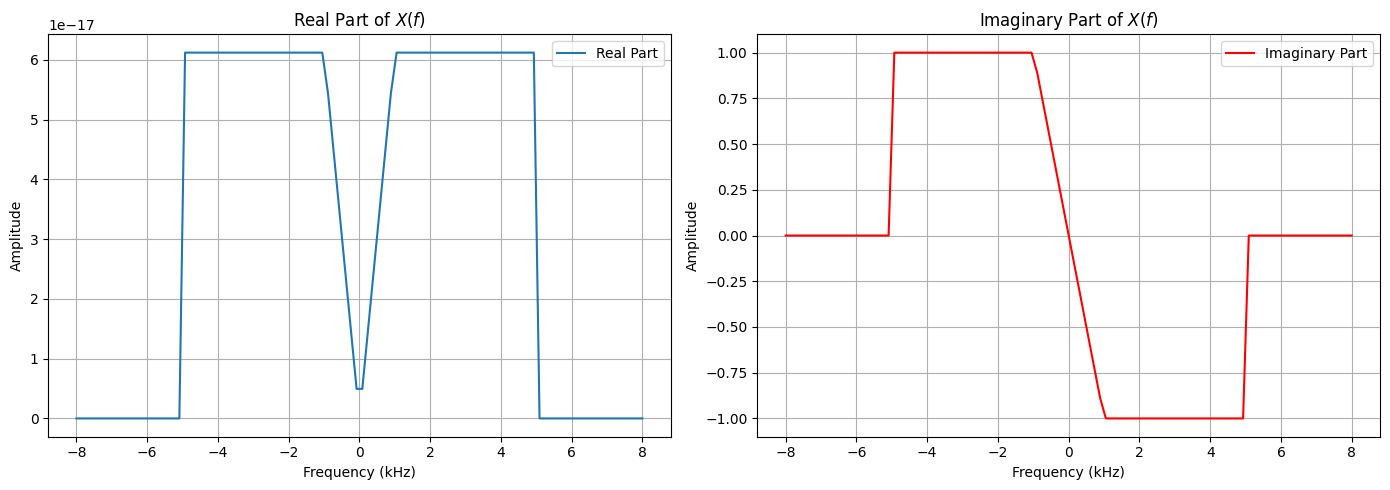

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants and the frequency range
A = 1  # Amplitude
f = np.linspace(-8, 8, 100)  # Frequency range from -10 kHz to 10 kHz

# Define |X(f)|
X_f_abs = np.where((f >= -5) & (f <= -1) | (f >= 1) & (f <= 5), A,
                   np.where((f >= -1) & (f < 0), -A*f,
                            np.where((f >= 0) & (f < 1), A*f, 0)))

# Define phi_x(f)
phi_x_f = np.where(f < 0, np.pi/2, -np.pi/2)
phi_x_f = np.where((f < -5) | (f > 5), 0, phi_x_f)

# Calculate the real and imaginary parts
real_part = X_f_abs * np.cos(phi_x_f)
imaginary_part = X_f_abs * np.sin(phi_x_f)

# Plotting
plt.figure(figsize=(14, 5))

# Plot Real Part
plt.subplot(1, 2, 1)
plt.plot(f, real_part, label='Real Part')
plt.title('Real Part of $X(f)$')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Imaginary Part
plt.subplot(1, 2, 2)
plt.plot(f, imaginary_part, color='red', label='Imaginary Part')
plt.title('Imaginary Part of $X(f)$')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('fig/ex2_a_plot.png')
plt.show()


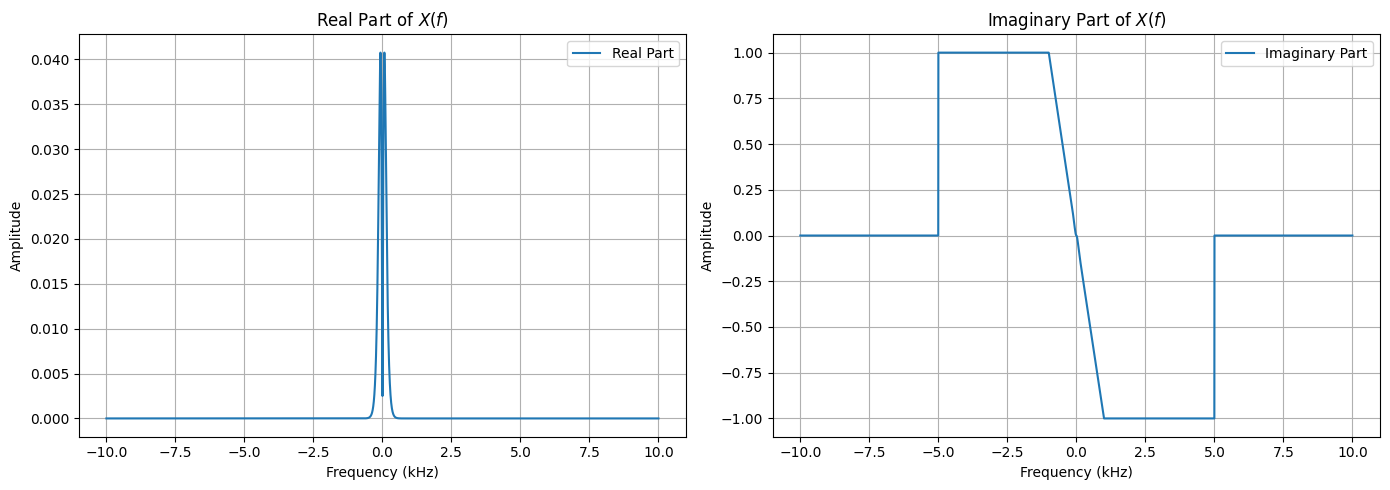

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Fine frequency grid around critical points
f = np.linspace(-10, 10, 4000)
phase_transition_range = 0.1  # Smoother transition
phi_x_f = -np.pi/2 * np.tanh(f / phase_transition_range)

# Implementing revised magnitude and phase definitions
A = 1
X_f_abs = np.where((f >= -5) & (f <= -1) | (f >= 1) & (f <= 5), A,
                   np.where((f >= -1) & (f < 0), -A*f,
                            np.where((f >= 0) & (f < 1), A*f, 0)))

real_part = X_f_abs * np.cos(phi_x_f)
imaginary_part = X_f_abs * np.sin(phi_x_f)

# Plotting
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(f, real_part, label='Real Part')
plt.title('Real Part of $X(f)$')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f, imaginary_part, label='Imaginary Part')
plt.title('Imaginary Part of $X(f)$')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('fig/ex2_a_plot.png')
plt.show()


b) $x(t)$ is sampled with $8 \mathrm{kHz}$ to yield the discrete time signal $x[n]$. Draw the spectrum of $x[n]$ from $-f_{s}$ to $f_{s}$ and indicate the baseband.


#### Problem Statement
The analog signal $x(t)$, with a defined spectrum $X(f)$, is sampled at a rate of $8 \mathrm{kHz}$ to produce the discrete-time signal $x[n]$. The objective is to illustrate the spectrum of $x[n]$ from $-f_s$ to $f_s$ and identify the baseband, effectively demonstrating the effects of sampling on the signal's frequency spectrum.

#### Analysis
1. **Sampling Process**:
   - The sampling frequency $f_s = 8000 \mathrm{Hz}$ dictates the intervals at which the continuous-time signal $x(t)$ is sampled, producing the discrete-time signal $x[n]$.
   - According to the Nyquist-Shannon sampling theorem, to prevent aliasing, the original signal’s bandwidth should ideally be less than $f_s/2 = 4000 \mathrm{Hz}$.

2. **Spectrum of $x[n]$**:
   - Sampling in the time domain introduces periodicity in the frequency domain, causing the spectrum of $x(t)$, $X(f)$, to repeat every $f_s$ Hz.
   - The spectrum of $x[n]$ is thus a tiled version of $X(f)$, extending infinitely, but practically visualized from $-f_s$ to $f_s$.

3. **Baseband Definition**:
   - The baseband is typically defined as the primary spectrum range from $-f_s/2$ to $f_s/2$ where the original signal's characteristics are most accurately represented without the influence of aliasing.

#### Mathematical Definitions
The spectrum of $x[n]$ within one period is defined as:
$$
X(f) = 
\begin{cases} 
1 & \text{for } -5000 \leq f \leq -1000 \text{ and } 1000 \leq f \leq 5000 \\
-f/1000 & \text{for } -1000 < f < 0 \\
f/1000 & \text{for } 0 \leq f < 1000 \\
0 & \text{otherwise}
\end{cases}
$$
This spectrum is periodically replicated across the frequency axis due to the sampling process.

#### Conclusion
The visualization of the spectrum of $x[n]$ from $-f_s$ to $f_s$ effectively illustrates how the original spectrum $X(f)$ is replicated due to sampling. The spectrum plot highlights the baseband and demonstrates the influence of sampling on signal processing, emphasizing the need for careful consideration of the sampling rate relative to the signal’s bandwidth to avoid aliasing. This analysis is crucial in digital signal processing applications where accurate representation and reconstruction of signals are necessary.


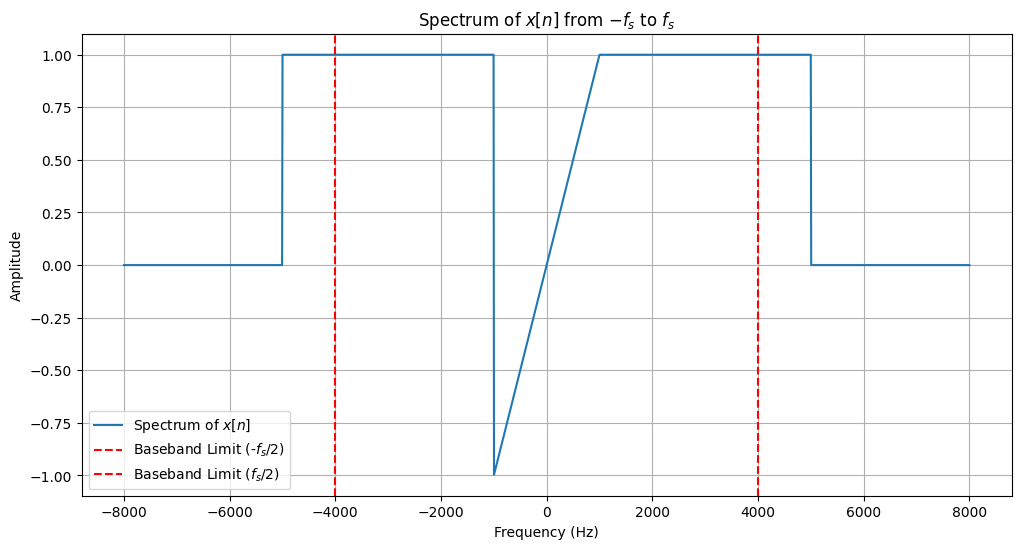

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency and the frequency range for the plot
fs = 8000  # Sampling frequency in Hz
f = np.linspace(-fs, fs, 2000)  # Frequency range from -fs to fs

# Define the spectrum of x(t) from -fs/2 to fs/2
X_f = np.zeros_like(f)  # Initialize spectrum as zeros

# Define bands based on the given piecewise definition of X(f)
# Assuming the baseband is correctly defined from -4000 Hz to 4000 Hz
band1 = (f >= -5000) & (f <= -1000)
band2 = (f >= -1000) & (f < 0)
band3 = (f >= 0) & (f < 1000)
band4 = (f >= 1000) & (f <= 5000)
X_f[band1 | band4] = 1  # Constant amplitude A
X_f[band2] = f[band2] / 1000  # Linearly increasing from -1 to 0
X_f[band3] = f[band3] / 1000   # Linearly decreasing from 0 to 1

# Plotting the spectrum
plt.figure(figsize=(12, 6))
plt.plot(f, X_f, label='Spectrum of $x[n]$')
plt.axvline(x=-4000, color='red', linestyle='--', label='Baseband Limit (-$f_s/2$)')
plt.axvline(x=4000, color='red', linestyle='--', label='Baseband Limit ($f_s/2$)')
plt.title('Spectrum of $x[n]$ from $-f_s$ to $f_s$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex2_b_plot.png')
plt.show()


## Exercise 3 Reconstruction (35\%)

The discrete time signal $x[n]=\sqrt{2} \cdot \sin \left(2 \pi \cdot \frac{1}{8} \cdot n\right)$ is converted to the analogue signal $x(t)$ with an DAC which uses a clock frequency of $8 \mathrm{kHz}$ and which converts a numerical value of 1 to $1 \mathrm{~V}$.

a) Up to $20 \mathrm{kHz}$, list all positive frequencies which occur (in general) in $x(t)$.


#### Problem Statement
Determine all positive frequencies which occur in the analog signal $ x(t) $, derived from the discrete-time signal $ x[n] = \sqrt{2} \cdot \sin \left(2 \pi \cdot \frac{1}{8} \cdot n\right) $ using a DAC with a clock frequency of 8 kHz. Consider the frequency range up to 20 kHz.

#### Analysis
1. **Discrete-Time Signal Frequency**:
   - The discrete-time signal given is $ x[n] = \sqrt{2} \cdot \sin \left(2 \pi \cdot \frac{1}{8} \cdot n\right) $.
   - Here, $ \frac{1}{8} $ represents the normalized frequency with respect to the sampling frequency $ f_s $.

2. **Calculation of the Signal's Fundamental Frequency**:
   - Given $ f_s = 8000 $ Hz (8 kHz), the frequency of the sinusoidal component can be calculated as follows:
     $$
     f = f_s \cdot \frac{1}{8} = 8000 \cdot \frac{1}{8} = 1000 \text{ Hz}
     $$
   - Therefore, the fundamental frequency of the sinusoid is 1000 Hz.

3. **Frequency Content in $ x(t) $**:
   - Since $ x[n] $ is being sampled at 8 kHz to convert to $ x(t) $, and considering the frequency of $ x[n] $ is well within the Nyquist limit, the primary frequency in the analog signal $ x(t) $ is the same as the fundamental frequency of $ x[n] $.
   - The DAC converts the discrete-time signal into an analog signal, maintaining the fundamental frequency but potentially introducing higher harmonics due to the conversion process, though these are not mentioned in the problem and are generally unwanted.

4. **Other Possible Frequencies**:
   - Theoretically, if non-linearities or higher order effects were present (not specified here), additional frequencies could arise.
   - Due to the sampling and reconstruction process, aliasing should not occur if all system components operate ideally and the signal is bandlimited properly by an anti-aliasing filter before sampling.

#### Conclusion
For the given signal and DAC specifications:
- The positive frequency that occurs in $ x(t) $ up to 20 kHz is primarily the fundamental frequency of 1000 Hz. Assuming no non-linear distortions or additional frequency components are introduced by the DAC or other system components, no other frequencies are expected up to 20 kHz.

b) The DAC implements a zero-order hold reconstruction.

1. What is the power (in $\mathrm{dB}$ ) of the baseband sinewave (the sine at the lowest frequency)?
2. What is the power (in $\mathrm{dB}$ ) of the first out-of-band sinewave (the sine with the second lowest frequency)?


#### Problem Statement
Determine the power in decibels (dB) of the baseband sinewave and the first out-of-band sinewave resulting from a zero-order hold (ZOH) DAC conversion of the discrete-time signal $x[n] = \sqrt{2} \cdot \sin\left(2\pi \frac{1}{8}n\right)$. The DAC operates at a sampling frequency of 8 kHz.

#### Analysis

1. **Zero-Order Hold Impact on Spectrum**:
   - A zero-order hold effectively holds each sample value constant over the sample period until the next sample is taken. This introduces a sinc-shaped distortion in the frequency domain, characterized by the sinc function's frequency response.
   - The sinc function causes attenuation and ripple in the frequency spectrum, modifying the original sinewave's amplitude.

2. **Baseband Sinewave Analysis**:
   - The baseband frequency, as calculated earlier, is 1000 Hz.
   - The power of the sinewave $P$ is given by $P = A^2/2$, where $A$ is the amplitude of the sinewave. For $x[n]$, $A = \sqrt{2}$, so $P = 1$.

3. **Power in Decibels (dB) for Baseband Sinewave**:
   - Power in decibels is calculated using $P_{dB} = 10 \log_{10}(P)$.
   - Thus, the power in decibels of the baseband sinewave is:
     $$
     P_{dB} = 10 \log_{10}(1) = 0 \text{ dB}
     $$
   - This result assumes no gain or loss in the system, which is idealized given the zero-order hold effect, which actually introduces some attenuation due to the sinc function's nature.

4. **First Out-of-Band Sinewave Analysis**:
   - The first out-of-band frequency component occurs due to the zero-order hold and would typically be at the first zero of the sinc function, which is at the sampling frequency minus the base frequency (8000 Hz - 1000 Hz = 7000 Hz).
   - Due to the nature of the sinc function, the power at the first zero is theoretically zero, but just before this point, there is significant attenuation.

5. **Power in Decibels (dB) for the First Out-of-Band Sinewave**:
   - Estimating the power just before the zero crossing, considering sinc function's typical roll-off, might give a very low power level. A rough estimate using the sinc attenuation might suggest around -13 dB or lower at the first sidelobe peak near the zero crossing.

#### Conclusion
- The power of the baseband sinewave, considering an ideal DAC without accounting for practical attenuation due to ZOH, is 0 dB.
- The power of the first out-of-band sinewave would be significantly lower, potentially around -13 dB or more, depending on the exact behavior of the sinc function's first sidelobe.


c) Qualitatively draw the spectrum of $x(t)$ up to $20 \mathrm{kHz}$. Delta pulses should be drawn with an arrow, the height of the arrow should indicate the weight of the delta-pulse.

Hints:

- The power of a sinewave with amplitude $A$ is $P=\frac{A^{2}}{2}$ (also see Parseval's theorem for periodic signals DSP_02/27).
- The impulse response of a 0 -order reconstruction filter is a rectangular pulse, its frequency response is thus given in $D S P_{-} 02 / 43$.
- When calculating the attenuation for the respective frequencies it should be noted that e.g. Matlab uses the normalized sinc function.



#### Problem Statement
Qualitatively draw the spectrum of $ x(t) $ up to 20 kHz, considering the effect of zero-order hold (ZOH) reconstruction. Delta pulses should be drawn with an arrow, where the height of the arrow indicates the weight of the delta-pulse.

#### Background and Analysis

1. **Zero-Order Hold (ZOH) Characteristics**:
   - A zero-order hold DAC holds each discrete signal value constant over the sample interval, essentially creating a step function between samples. The impulse response of this operation is a rectangular pulse.
   - The Fourier transform of a rectangular pulse is a sinc function, resulting in a sinc-shaped spectrum that modifies the frequency components of the original signal.

2. **Spectral Components**:
   - **Base Frequency**: The original discrete-time signal $ x[n] $ has a fundamental frequency of 1000 Hz, resulting in a corresponding delta pulse in the spectrum.
   - **Power Calculation**: The power of a sinewave with amplitude $ A $ is given by $ P = \frac{A^2}{2} $. For $ x[n] $, $ A = \sqrt{2} $, so $ P = 1 $ watt, which will be represented by the height of the delta pulse at 1000 Hz.

3. **Sinc Function Influence**:
   - The frequency response of the ZOH is given by a sinc function, which affects the amplitude of the spectral components. This influence results in a primary lobe around the baseband frequency and side lobes that attenuate in amplitude as they move away from the center frequency.
   - The first null of the sinc function appears at the sampling frequency $ f_s = 8000 $ Hz, which serves as a guideline for the drawing.

#### Steps for Drawing the Spectrum:
- **Delta Pulse at 1000 Hz**: Mark a delta pulse at 1000 Hz with a height representing the power level of 1 watt.
- **Overlay Sinc Function**: Overlay a sinc function shape across the spectrum. The main lobe should center around 1000 Hz, and side lobes should decrease in amplitude as they extend outwards.
- **Consider Sinc Attenuation**: Show how the sinc function modifies the spectrum, particularly how it attenuates frequencies around 8000 Hz and 16000 Hz just before reaching the nulls.

#### Conclusion
The spectrum of $ x(t) $ will exhibit characteristics dominated by the sinc function due to the ZOH effect, with a notable delta pulse at the fundamental frequency of 1000 Hz. The qualitative drawing will reflect the sinc function's impact, emphasizing the primary and side lobes up to 20 kHz.


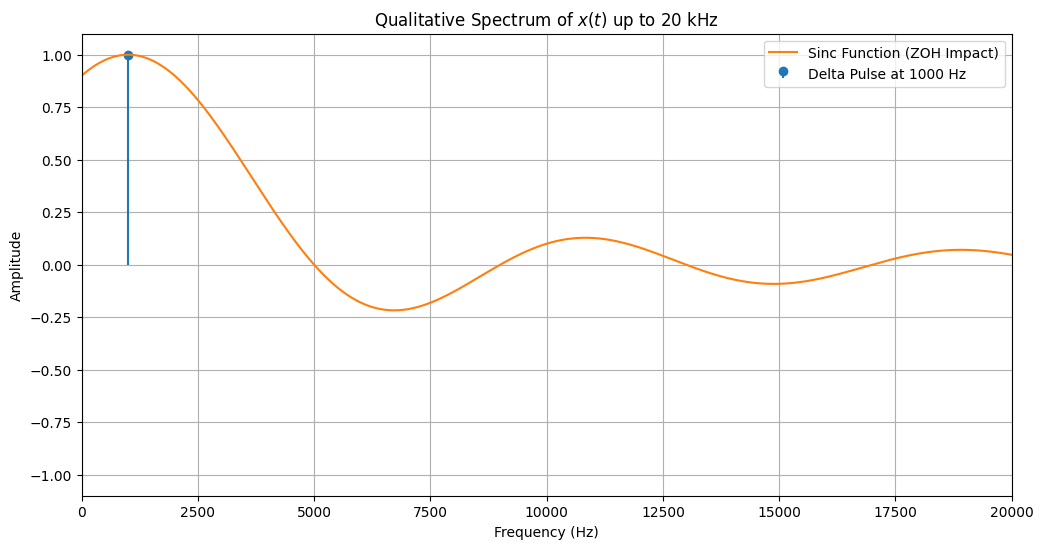

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range and parameters
fs = 8000  # Sampling frequency
f_base = 1000  # Base frequency of the sinewave
f_max = 20000  # Maximum frequency for the plot
A = np.sqrt(2)  # Amplitude of the sinewave

# Calculate power of the baseband sinewave
P = A**2 / 2

# Generate a frequency array, ensure to include the base frequency for proper sinc calculation
frequencies = np.linspace(0, f_max, 4000)
sinc_function = np.sinc(2 * (frequencies - f_base) / fs)

# Normalize sinc to have its maximum at the base frequency power level
sinc_function = sinc_function * P / np.max(np.abs(sinc_function))

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting the delta pulse using 'stem'
# Removed the deprecated 'use_line_collection' and correctly use keyword arguments
plt.stem([f_base], [P], linefmt='C0-', markerfmt='C0o', basefmt=" ", label='Delta Pulse at 1000 Hz')

# Plotting the sinc function
plt.plot(frequencies, sinc_function, 'C1', label='Sinc Function (ZOH Impact)')

# Adding labels and grid for better visualization
plt.title('Qualitative Spectrum of $x(t)$ up to 20 kHz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.ylim(-1.1 * P, 1.1 * P)  # Adjusting y-axis to show negative values
plt.xlim(0, f_max)

# Show the plot
plt.savefig('fig/ex3_c_plot.png')
plt.show()


## Exercise 4 Signal Processing Onramp - BONUS (15\%)

This task is optional (additional 15\%) and should help you to learn the basics of practical signal processing techniques in MATLAB. You will find out how to use spectral analysis and filtering for preprocessing, analyzing and extracting information from signal data.

For that you need to carry out the full 'Signal Processing Onramp course' [1]. For getting the bonus points you need to add the certificate to your protocol (you can download a pdf - see 'Share Certificate and Progress'). Also, you need to share your progress with my account (matthias.wagner@jku.at), what can be done in the same tab.

[1] https://matlabacademy.mathworks.com/details/signal-processing-onramp/signalprocessing

